##### Cours : OpenClassRooms

La data visualisation avec Matplotlib

##### Date : 31-01-23
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importation du fichier des prêts
prets = pd.read_csv('https://raw.githubusercontent.com/benjaminmrl/data-4452741/main/prets.csv')

# calcul du taux d'endettement
prets['taux_endettement'] = round(prets['remboursement'] * 100 / prets['revenu'], 2)

# renommer taux en taux_interet
prets.rename(columns={'taux':'taux_interet'}, inplace=True)

# calculer le cout total du pret
prets['cout_total'] = prets['remboursement'] * prets['duree']

# calculer les bénéfices mensuels réalisés
prets['benefices'] = round((prets['cout_total'] * prets['taux_interet']/100)/(24), 2)

# création d'une variable risque
prets['risque'] = 'Non'
prets.loc[prets['taux_endettement'] > 35, 'risque'] = 'Oui'

# dataframe de profils clients
profil_clients = prets.groupby('identifiant')[['remboursement','taux_endettement','cout_total','benefices']].sum()
profil_clients.reset_index(inplace=True)

##### <font color = 'green'>Personnalisation des graphiques</font>
On a plusieurs possibilités pour personnaliser un graphique qui peut donc très bien s'implémenter dans Power BI

Lien sur des exemples de personnalisation de graphiques :
https://nbviewer.org/urls/gist.githubusercontent.com/Jwink3101/e6b57eba3beca4b05ec146d9e38fc839/raw/f486ca3dcad44c33fc4e7ddedc1f83b82c02b492/Matplotlib_Cheatsheet

In [3]:
data = prets.groupby('ville')['remboursement'].sum()
data = data.reset_index()
data

,ville,remboursement
0,BORDEAUX,15330.59
1,LYON,26064.67
2,MARSEILLE,40895.72
3,NICE,23544.24
4,PARIS,94052.61
5,TOULOUSE,19286.18


<font color='yellow'> Modification des éléments exterieurs

Text(0, 0.5, "Chiffre d'affaires (en €)")

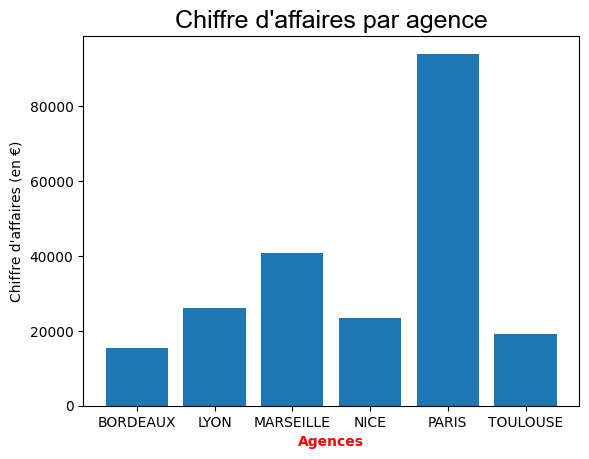

In [4]:
# Affichage sous la forme d'un diagramme en barre
plt.bar(data['ville'], data['remboursement'])
plt.title("Chiffre d'affaires par agence", # Ajout d'un titre
          fontname='Arial', fontsize=18) # personnalisation du titre
plt.xlabel("Agences", # Titre de l'axe des abscisses
           color='red', fontweight='bold') # personnalisation de l'axe
plt.ylabel("Chiffre d'affaires (en €)") # Titre de l'axe des ordonnées

<font color='yellow'> Modification des éléments intérieurs

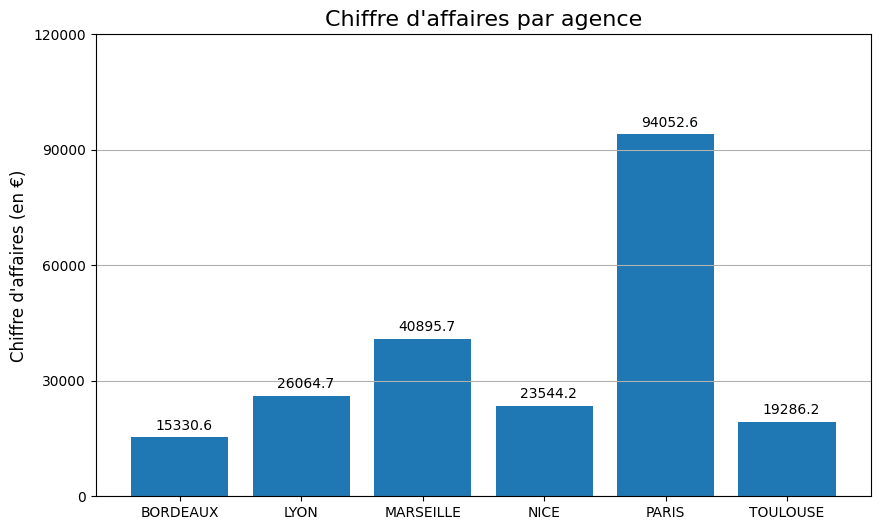

In [5]:
# Affichage sous la forme d'un diagramme en barre
plt.figure(figsize=(10, 6)) # Agrandissement de la taille de la fenêtre
plt.bar(data['ville'], data['remboursement'])
plt.title("Chiffre d'affaires par agence", fontsize=16)
plt.ylabel("Chiffre d'affaires (en €)", fontsize=12) 
plt.grid(axis='y') # Cadrillage sur l'axe des ordonnées uniquement
plt.ylim(0, 120_000) # Fixation des graduations min et max de l'axe y
plt.yticks([0, 30_000, 60_000, 90_000, 120_000]) # graduations à afficher axe y

ca = data['remboursement'].tolist() # conversion en liste du champ 'remboursement'
for i in range(6): # 6 = nombre de barres
    plt.text( # insertion du CA dans chaque barre
        i - 0.2, # emplacement du texte <-> barre
        ca[i] + 2_000, # espacement du texte <-> barre
        round(ca[i], 1) # arrondissement des CA affichés
        ) 

##### <font color = 'green'>Cas pratique</font>

Les bénéfices mensuels de l’année 2021 viennent de sortir par type de prêt au niveau de l’agence où vous travaillez. Dans le cadre du reporting mensuel, il vous est demandé de réaliser un graphique spécifique représentant l’évolution du bénéfices mensuels sur l’année, par type de prêt. On a les données suivantes à disposition :

In [6]:
CA = pd.read_csv('https://raw.githubusercontent.com/benjaminmrl/data-4452741/main/CA.csv')
CA['date'] = pd.to_datetime(CA['date'])
CA.head()

,date,immobilier,automobile,consommation
0,2021-01-01,10439,5096,3808
1,2021-02-01,11266,5146,5838
2,2021-03-01,11315,5276,5601
3,2021-04-01,11456,5067,3639
4,2021-05-01,10816,4937,5273


L'objectif est d'obtenir le graphique qui ait cette forme : 
![image-3.png](https://github.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/blob/main/notebooks/P3/img.png?raw=true)

Pour expliciter rapidement les différents aspects qui avaient été réalisés :
- la fenêtre graphique est de dimension 10x7
- une courbe a été tracée pour chaque type de prêt, de dimension 3
- la légende est apparente
- le titre de l'axe des ordonnées a été ajouté
- la police des graduations (ticks) a été fixée à 11
- la police du titre a été fixée à 14
- le quadrillage apparait en gris, avec une taille de 0.5

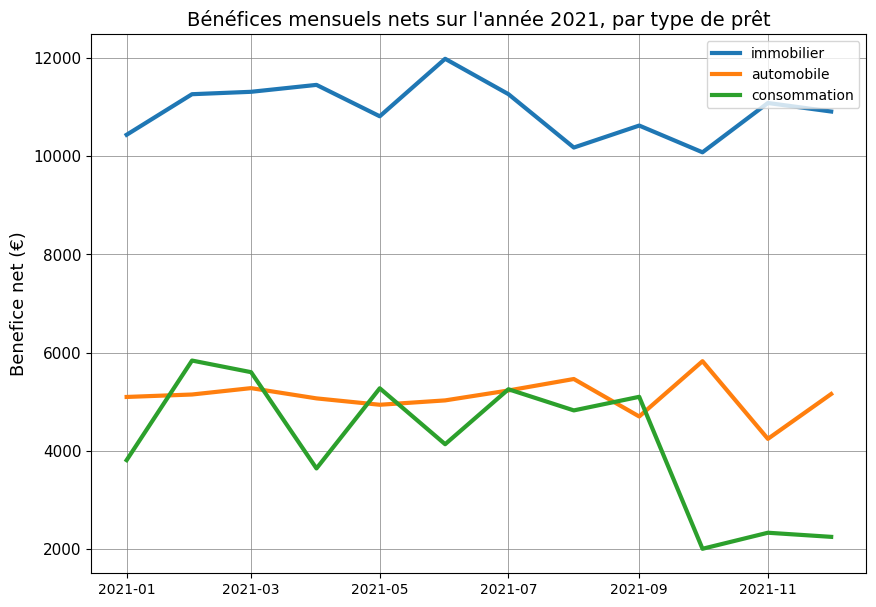

In [8]:
plt.figure(figsize=(10, 7)) # Taille de la fenêtre
plt.plot(CA['date'], CA['immobilier'], # courbe immobilier
         label='immobilier', # légende
         linewidth=3) # épaisseur de la courbe
plt.plot(CA['date'], CA['automobile'], 
         label='automobile', # légende
         linewidth=3) # épaisseur de la courbe
plt.plot(CA['date'], CA['consommation'], 
         label='consommation', # légende
         linewidth=3) # épaisseur de la courbe
plt.legend(loc='upper right') # emplacement de la légende (haut à droite)
plt.ylabel('Benefice net (€)', fontsize=13) # Titre et taille axe y
plt.yticks(fontsize=11) # taille des graduations axe y
plt.title( # titre du graphique
    "Bénéfices mensuels nets sur l'année 2021, par type de prêt", 
    fontsize=14)
plt.grid(
    color='gray', # Couleur de la gruille
    linestyle='-', # Style de la grille
    linewidth=0.5) # épaisseur de la grille
